In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teilversuch 1
### Messwerte

In [16]:
h  = np.array([7.2,7.4,7.6,7.8,8.0,8.2,8.4,8.6,8.8,9.0]) #Kolbenposition in cm
S1 = np.ones(10)*47.5    #Messwerte der Linken Säule mm
S1[5] = 47.6
S1 *= 10
S2 = np.array([47.7,45.8,43.7,42.1,40.5,39.0,37.2,36.0,34.5,31.0])*10 #Messwerte der rechten Säule in mm
P0 = 727       #Messwert des Absolutmonometers in mm 

P = P0-(S1-S2)
P0_P = P0/P

#Letzter Wert wird ausgelassen
P0_P = P0_P[:-1]
h = h[:-1]

### Curve Fit

In [21]:
coeff,cov = np.polyfit(h,P0_P,1,cov = True)

fit = np.poly1d(coeff)
fit_graph = fit(h)

print('Kehrwert der Steigung beträgt: '+str(np.round(1/coeff[0],2)))

Kehrwert der Steigung beträgt: 7.28


In [22]:
fit = np.poly1d(coeff)
fit_graph = fit(h)

### Plot

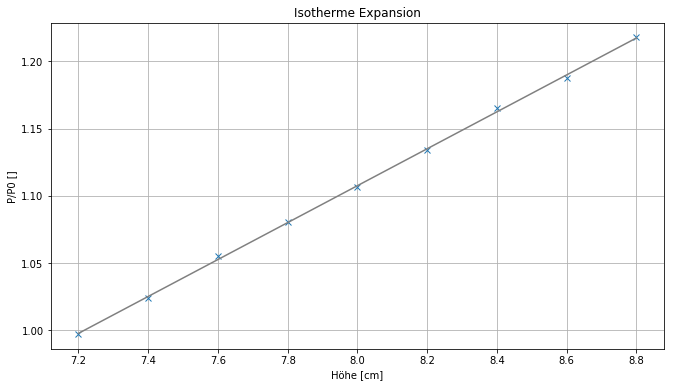

In [24]:
plt.figure(figsize = (11,6))
plt.plot(h,P0_P,'x')
plt.plot(h,fit_graph,color='gray')
plt.title('Isotherme Expansion')
plt.xlabel('Höhe [cm]')
plt.ylabel('P/P0 []')
plt.grid(True)
plt.show()

# Teilversuch 2
### Messwerte

In [50]:
t = np.array([88.2,75.0,60.3,45.0,18.8,15.0,0.1])
P1 = np.array([47.5,47.6,47.6,47.6,47.5,47.5,47.5])*10
P2 = np.array([33.0,31.4,29.2,26.4,24.0,21.5,18.3])*10
P0 = 727

P = P0-(P1-P2)
P_ = P/P[-1]

### Curve Fit

In [53]:
coeff = np.polyfit(t,P_,1)
print('Beta:'+str(np.round(coeff[0],4)))
print('T0:  '+str(np.round(1.0/coeff[0],3)))
coeff_diff = 1/273.15-coeff[0]

Beta:0.0036
T0:  273.998


In [54]:
fit = np.poly1d(coeff)
fit_graph = fit(t)

### Plot

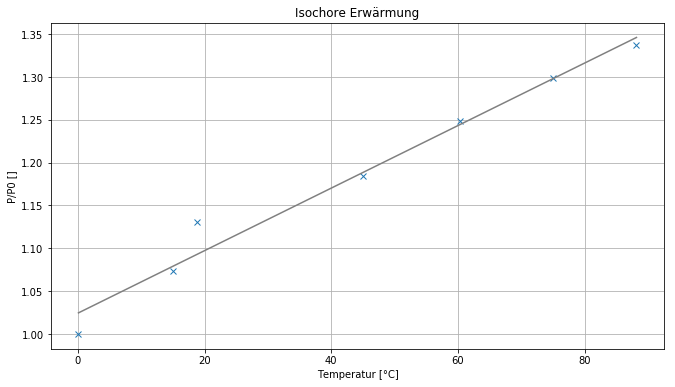

In [55]:
plt.figure(figsize=(11,6))
plt.plot(t,P_,'x')
plt.plot(t,fit_graph,color = 'gray')
plt.title('Isochore Erwärmung')
plt.xlabel('Temperatur [°C]')
plt.ylabel('P/P0 []')
plt.grid(True)
plt.show()

# Teilversuch 3
### Messwerte

In [65]:
t = np.array([0.1,14.8,29.8,45.0,60.1,75.1,90.0])
h = np.array([5.3,5.6,5.9,6.4,6.6,6.9,7.2])
h_h0 = h/h[0]

### Curve Fit

In [71]:
coeff = np.polyfit(t,h_h0,1)
print('alpha: '+str(coeff[0]))
print('T0: '+str(1/coeff[0]))
coeff_diff = coeff[0]-1/273.15
print('Die gemessene Steigung weicht damit um '+str(np.round(coeff_diff,4))+' vom theoretischen Wert ab.')

alpha: 0.004037724483957519
T0: 247.66424850758116
Die gemessene Steigung weicht damit um 0.0004 vom theoretischen Wert ab.


Da die Temperaturmessung stark von der Position der Messonde abhängig war ist eine solche Abweichung zu erwarten.

In [67]:
fit = np.poly1d(coeff)
fit_graph = fit(t)

### Plot

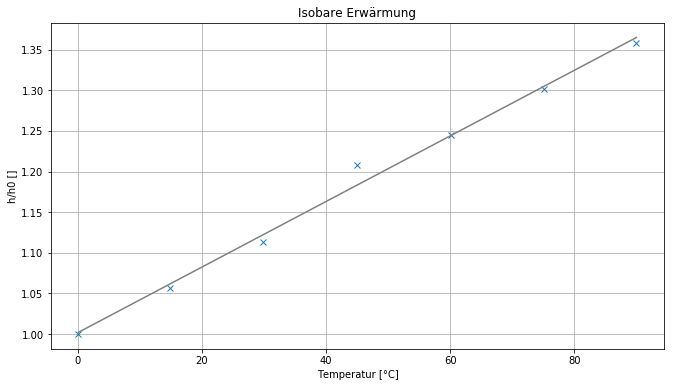

In [68]:
plt.figure(figsize=(11,6))
plt.plot(t,h_h0,'x')
plt.plot(t,fit_graph,color = 'gray')
plt.title('Isobare Erwärmung')
plt.xlabel('Temperatur [°C]')
plt.ylabel('h/h0 []')
plt.grid(True)
plt.show()